In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [3]:
!wget https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv

--2025-11-23 16:26:42--  https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5698602 (5.4M) [text/csv]
Saving to: ‘tmdb_5000_movies.csv’

tmdb_5000_movies.cs 100%[===================>]   5.43M  10.4MB/s    in 0.5s    

2025-11-23 16:26:43 (10.4 MB/s) - ‘tmdb_5000_movies.csv’ saved [5698602/5698602]



Reading the csv movie file

In [4]:
df = pd.read_csv('tmdb_5000_movies.csv')

checking how the data look like

In [5]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [28]:
x = df.iloc[0]
x

,0
budget,237000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/
id,19995
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":..."
original_language,en
original_title,Avatar
overview,"In the 22nd century, a paraplegic Marine is di..."
popularity,150.437577
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289..."


In [29]:
x['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [30]:
x['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [31]:
j = json.loads(x['genres'])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [32]:
j[0]

{'id': 28, 'name': 'Action'}

checking and add all the genres in one string

In [46]:
jj = ""
for i in j:
  jj += ''.join(i["name"].split()) + " "

jj

'Action Adventure Fantasy ScienceFiction '

checking the keywords

In [39]:
key = json.loads(x['keywords'])
key

[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

In [50]:
kk = ""
for i in key:
  kk += "".join(i['name'].split()) + " "

kk

'cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d '

converting the genres and the keywords in to one string

In [54]:
def genre_and_keywords_to_string(row):
  genres = json.loads(row['genres'])
  genres = "".join("".join(i['name'].split()) + " " for i in genres)

  keywords = json.loads(row['keywords'])
  keywords = "".join("".join(i['name'].split()) + " " for i in keywords)

  return f"{genres} {keywords}"

create a new string representation of each movie

In [55]:
df["string"] = df.apply(genre_and_keywords_to_string, axis=1)

In [56]:
df['string']

,string
0,Action Adventure Fantasy ScienceFiction cultu...
1,Adventure Fantasy Action ocean drugabuse exot...
2,Action Adventure Crime spy basedonnovel secre...
3,Action Crime Drama Thriller dccomics crimefig...
4,Action Adventure ScienceFiction basedonnovel ...
...,...
4798,Action Crime Thriller unitedstates–mexicobarr...
4799,Comedy Romance
4800,Comedy Drama Romance TVMovie date loveatfirst...
4801,


create a tf-idf vectorizer object

In [57]:
tfidf = TfidfVectorizer(max_features=2000)

create a data matrix from the overviews

In [59]:
Xtrain = tfidf.fit_transform(df['string'])
Xtrain

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 37285 stored elements and shape (4803, 2000)>

generate a mapping from movie title - index (in df)

In [60]:
movie2idx = pd.Series(df.index, index=df['title'])
movie2idx

,0
title,
Avatar,0
Pirates of the Caribbean: At World's End,1
Spectre,2
The Dark Knight Rises,3
John Carter,4
...,...
El Mariachi,4798
Newlyweds,4799
"Signed, Sealed, Delivered",4800


In [92]:
idx = movie2idx['Avatar']
idx

np.int64(0)

In [93]:
query = Xtrain[idx]
query

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20 stored elements and shape (1, 2000)>

print the query vector

In [94]:
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

compute similarity between query and every vector in X

In [95]:
scores = cosine_similarity(query, Xtrain)
scores

array([[1.        , 0.03604495, 0.03852693, ..., 0.01733507, 0.        ,
        0.        ]])

currently the array is 1 x N, make it just a 1-D array

In [96]:
scores = scores.flatten()

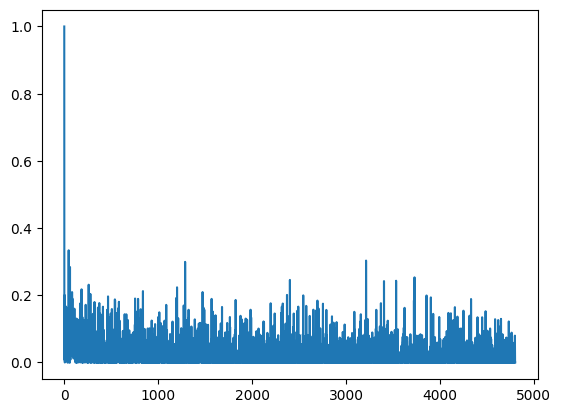

In [97]:
plt.plot(scores)

In [98]:
(-scores).argsort()

array([   0,   47, 3214, ..., 4771,   34, 4802])

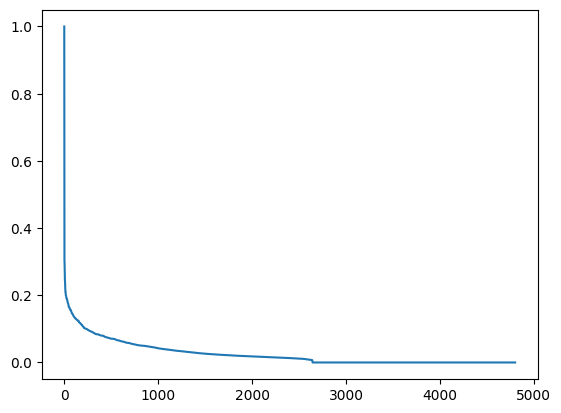

In [99]:
plt.plot(scores[(-scores).argsort()]);

get the top 5 matches
exclude self (similarity between query and itself yields max score)

In [114]:
recommended_idx = (-scores).argsort()[1:6]

convert indices back to titles

In [118]:
df[['title', 'string']].iloc[recommended_idx]

,title,string
0,Avatar,Action Adventure Fantasy ScienceFiction cultu...
47,Star Trek Into Darkness,Action Adventure ScienceFiction spacecraft fr...
3214,Barbarella,ScienceFiction sexualfantasy alienplanet dist...
1287,A Monster in Paris,Adventure Animation Comedy Family Fantasy mon...
61,Jupiter Ascending,ScienceFiction Fantasy Action Adventure jupit...
3730,Cargo,Thriller Mystery ScienceFiction spacecolony s...


create a function that generates recommendations

In [123]:
def recommend(title):
  # get the row in the dataframe for this movies
  idx = movie2idx[title]
  if (type(idx) == pd.Series):
    idx = idx.iloc[0]

  # calculate the pairwise similarities for each movie
  query = Xtrain[idx]
  scores = cosine_similarity(query, Xtrain)

  # currently the array is 1 x N, make it just a 1-D array
  scores = scores.flatten()

  # get the index of the highest scoring movies
  # get the first K recommendations
  # don't return itself!
  recommended_idx = (-scores).argsort()[1:6]

  # return the titles of the recommended movies
  return df["title"].iloc[recommended_idx]

In [124]:
print("Recommendations for movies: " )
print(recommend('Scream 3'))

Recommendations for movies: 
3902    Friday the 13th Part VI: Jason Lives
4628                          Graduation Day
4053        Friday the 13th: A New Beginning
4048                             The Calling
1084                         The Glimmer Man
Name: title, dtype: object


In [125]:
print("Recommendations for movies: " )
print(recommend('Mortal Kombat'))

Recommendations for movies: 
1611              Mortal Kombat: Annihilation
1670                       DOA: Dead or Alive
3856              In the Name of the King III
1001    Street Fighter: The Legend of Chun-Li
2237                        Alone in the Dark
Name: title, dtype: object


In [127]:
print("Recommendations for movies: " )
print(recommend('Runaway Bride'))

Recommendations for movies: 
4115                    House of D
2325    My Big Fat Greek Wedding 2
3313                  An Education
4604         It Happened One Night
2689            Our Family Wedding
Name: title, dtype: object
